### Context
Collection of sports images covering 100 different sports. Images are 224,224,3 jpg format. Data is separated into train, test and valid directories. Additionallly a csv file is included for those that wish to use it to create there own train, test and validation datasets.

Images were gathered from internet searches. The images were scanned with a duplicate image detector program I wrote. Any duplicate images were removed to prevent bleed through of images between the train, test and valid data sets. All images were then resized to 224 X224 X 3 and converted to jpg format. A csv file is included that for each image file contains the relative path to the image file, the image file class label and the dataset (train, test or valid) that the image file resides in. This is a clean dataset. 

### Data Source
- Dataset: [kaggle](https://www.kaggle.com/datasets/gpiosenka/sports-classification)

### Data Importing and Overview

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [62]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential



In [63]:
# Specify training, valid, and test data directories
training_data_dir = 'Data/train'
valid_data_dir = 'Data/valid'
test_data_dir = 'Data/test'

In [64]:
# List the folders in the training directory
# sort the names
sport_names = os.listdir(training_data_dir)
sport_names = sorted(sport_names)

#print(type(sport_names))

sport_names

['air hockey',
 'ampute football',
 'archery',
 'arm wrestling',
 'axe throwing',
 'balance beam',
 'barell racing',
 'baseball',
 'basketball',
 'baton twirling',
 'bike polo',
 'billiards',
 'bmx',
 'bobsled',
 'bowling',
 'boxing',
 'bull riding',
 'bungee jumping',
 'canoe slamon',
 'cheerleading',
 'chuckwagon racing',
 'cricket',
 'croquet',
 'curling',
 'disc golf',
 'fencing',
 'field hockey',
 'figure skating men',
 'figure skating pairs',
 'figure skating women',
 'fly fishing',
 'football',
 'formula 1 racing',
 'frisbee',
 'gaga',
 'giant slalom',
 'golf',
 'hammer throw',
 'hang gliding',
 'harness racing',
 'high jump',
 'hockey',
 'horse jumping',
 'horse racing',
 'horseshoe pitching',
 'hurdles',
 'hydroplane racing',
 'ice climbing',
 'ice yachting',
 'jai alai',
 'javelin',
 'jousting',
 'judo',
 'lacrosse',
 'log rolling',
 'luge',
 'motorcycle racing',
 'mushing',
 'nascar racing',
 'olympic wrestling',
 'parallel bar',
 'pole climbing',
 'pole dancing',
 'pole vau

- In the context of machine learning and deep learning, "tensor images" typically refers to images that have been transformed into tensor data structures for processing.   
A tensor is a generalization of vectors and matrices to potentially higher dimensions, and in machine learning frameworks like TensorFlow and PyTorch,   
tensors are the fundamental data structures used to hold data.

- When you're dealing with images in machine learning:

1. Images as Tensors: Each image is converted into a tensor of shape (height, width, channels), where channels represent color depth (e.g., 3 for RGB, 1 for grayscale).

2. Normalization: The rescale=1./255 in your ImageDataGenerator function is a normalization step. It scales the pixel values in the images from a range of 0-255 to 0-1.   
This normalization helps in speeding up the learning process during model training, as smaller values (close to zero) are generally easier for the model to handle.

In [66]:
# Use image generator to generate tensor images data and normalize them
image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [67]:
# Generate batches of 500 images
# Perform shuffling and image resizing

train_generator = image_generator.flow_from_directory(
    batch_size=64,
    directory=training_data_dir,
    shuffle=True,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 13492 images belonging to 100 classes.


In [68]:
valid_generator = image_generator.flow_from_directory(
    batch_size=64,
    directory=valid_data_dir,
    shuffle=False,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 500 images belonging to 100 classes.


In [69]:
test_generator = image_generator.flow_from_directory(
    batch_size=64,
    directory=test_data_dir,
    shuffle=False,
    target_size=(224, 224),
    class_mode='categorical'
)

Found 500 images belonging to 100 classes.


In [70]:
# Generate a batch of 500 images and labels
train_images, train_labels = next(train_generator)

In [71]:
train_images.shape

(64, 224, 224, 3)

In [72]:
train_labels.shape

(64, 100)

In [73]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [74]:
# labels Translator 
label_names = {index : label for index, label in enumerate(sport_names)}
label_names

{0: 'air hockey',
 1: 'ampute football',
 2: 'archery',
 3: 'arm wrestling',
 4: 'axe throwing',
 5: 'balance beam',
 6: 'barell racing',
 7: 'baseball',
 8: 'basketball',
 9: 'baton twirling',
 10: 'bike polo',
 11: 'billiards',
 12: 'bmx',
 13: 'bobsled',
 14: 'bowling',
 15: 'boxing',
 16: 'bull riding',
 17: 'bungee jumping',
 18: 'canoe slamon',
 19: 'cheerleading',
 20: 'chuckwagon racing',
 21: 'cricket',
 22: 'croquet',
 23: 'curling',
 24: 'disc golf',
 25: 'fencing',
 26: 'field hockey',
 27: 'figure skating men',
 28: 'figure skating pairs',
 29: 'figure skating women',
 30: 'fly fishing',
 31: 'football',
 32: 'formula 1 racing',
 33: 'frisbee',
 34: 'gaga',
 35: 'giant slalom',
 36: 'golf',
 37: 'hammer throw',
 38: 'hang gliding',
 39: 'harness racing',
 40: 'high jump',
 41: 'hockey',
 42: 'horse jumping',
 43: 'horse racing',
 44: 'horseshoe pitching',
 45: 'hurdles',
 46: 'hydroplane racing',
 47: 'ice climbing',
 48: 'ice yachting',
 49: 'jai alai',
 50: 'javelin',
 5

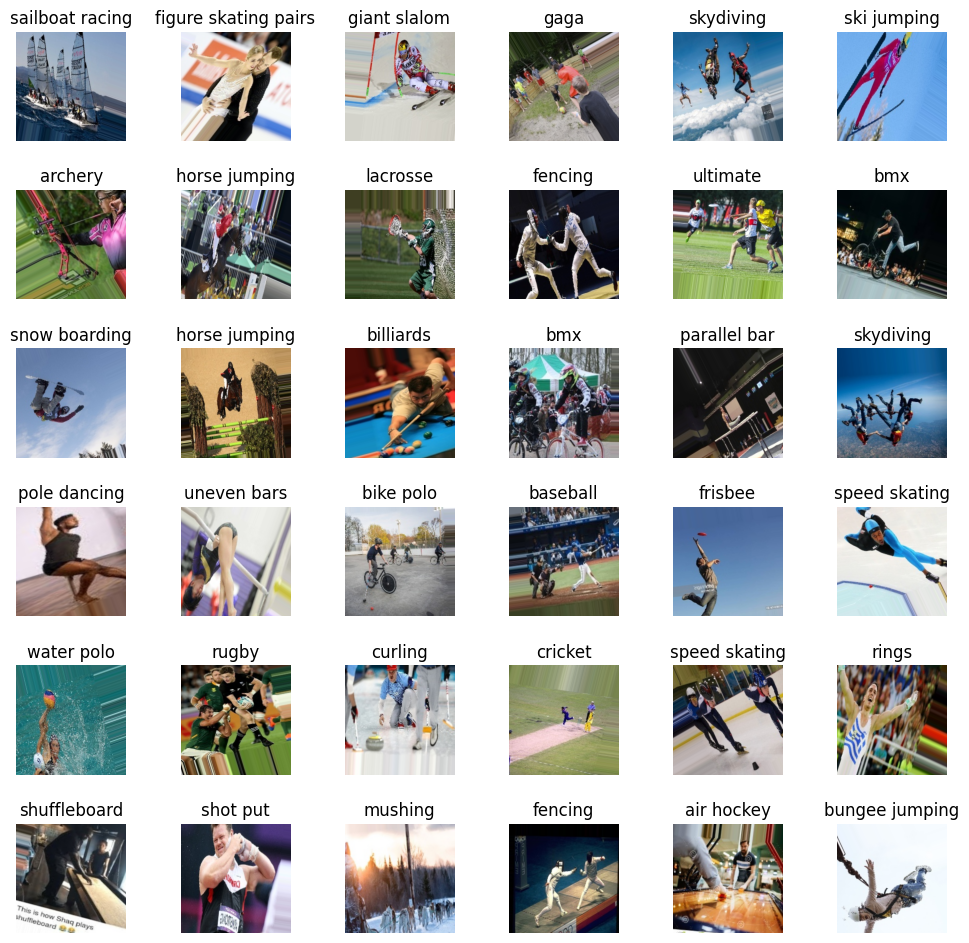

In [75]:
# Create a grid of 36 images along with their corresponding labels
L = 6
W = 6

fig, axes = plt.subplots(L, W, figsize = (12, 12))

"""The axes array is originally a 2D array (6x6), corresponding to the grid layout. 
The ravel() function flattens this array into a 1D array for easier iteration. 
This means axes[0] to axes[35] will correspond to the subplot grid positions from top-left to bottom-right.
"""
axes = axes.ravel() # Flattening the Axes Array

for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5)    

### Transfer Learning

In [76]:
basemodel = EfficientNetB3(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)), pooling='max')

In [77]:
# Freeze the base model layers (optional, can be fine-tuned later)

for layer in basemodel.layers[:100]:
    layer.trainable = False
for layer in basemodel.layers[100:]:
    layer.trainable = True

In [78]:
model = Sequential([
    basemodel,
    BatchNormalization(),
    Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.1),
    Dense(100, activation='softmax')
])

In [79]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [80]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization_2 (Bat  (None, 1536)              6144      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 512)               786944    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)              

In [81]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpointer = ModelCheckpoint(filepath="EfficientNetB3_weights.hdf5", verbose=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)


In [82]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=valid_generator,
    callbacks=[checkpointer, earlystopping, reduce_lr]
)

Epoch 1/30


2024-07-02 19:50:10.981044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


211/211 [==============================] - ETA: 0s - loss: 8.9656 - accuracy: 0.0128

2024-07-02 19:51:38.737551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 5.79520, saving model to EfficientNetB3_weights.hdf5
211/211 [==============================] - 98s 403ms/step - loss: 8.9656 - accuracy: 0.0128 - val_loss: 5.7952 - val_accuracy: 0.0140 - lr: 0.0010
Epoch 2/30
211/211 [==============================] - ETA: 0s - loss: 6.9770 - accuracy: 0.0168
Epoch 2: val_loss improved from 5.79520 to 5.36486, saving model to EfficientNetB3_weights.hdf5
211/211 [==============================] - 77s 362ms/step - loss: 6.9770 - accuracy: 0.0168 - val_loss: 5.3649 - val_accuracy: 0.0280 - lr: 0.0010
Epoch 3/30
211/211 [==============================] - ETA: 0s - loss: 6.1213 - accuracy: 0.0278
Epoch 3: val_loss improved from 5.36486 to 4.98831, saving model to EfficientNetB3_weights.hdf5
211/211 [==============================] - 89s 421ms/step - loss: 6.1213 - accuracy: 0.0278 - val_loss: 4.9883 - val_accuracy: 0.0260 - lr: 0.0010
Epoch 4/30
211/211 [==============================] - ETA: 0s - loss: 5.7832 - acc

In [83]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=valid_generator,
    callbacks=[checkpointer, earlystopping, reduce_lr]
)

Epoch 1/20
211/211 [==============================] - ETA: 0s - loss: 1.1090 - accuracy: 0.7917
Epoch 1: val_loss did not improve from 0.93597
211/211 [==============================] - 78s 362ms/step - loss: 1.1090 - accuracy: 0.7917 - val_loss: 0.9944 - val_accuracy: 0.7580 - lr: 2.0000e-04
Epoch 2/20
211/211 [==============================] - ETA: 0s - loss: 1.1014 - accuracy: 0.8029
Epoch 2: val_loss did not improve from 0.93597
211/211 [==============================] - 75s 355ms/step - loss: 1.1014 - accuracy: 0.8029 - val_loss: 0.9377 - val_accuracy: 0.7800 - lr: 2.0000e-04
Epoch 3/20
211/211 [==============================] - ETA: 0s - loss: 1.0812 - accuracy: 0.8109
Epoch 3: val_loss improved from 0.93597 to 0.93226, saving model to EfficientNetB3_weights.hdf5
211/211 [==============================] - 83s 390ms/step - loss: 1.0812 - accuracy: 0.8109 - val_loss: 0.9323 - val_accuracy: 0.7880 - lr: 2.0000e-04
Epoch 4/20
211/211 [==============================] - ETA: 0s - loss: